**Author: Fitria Dwi Wulandari (wulan391@sci.ui.ac.id) - September, 2020.**

# Hoax Detection

This project was made as a report for a Big Data Challenge at Satria Data 2020 by IPB University.

### Libraries

In [324]:
!pip install plotly

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly import graph_objs as go

### Import Dataset

In [2]:
# Import train dataset
df_train = pd.read_csv('Satria Data - Data Latih.csv', sep=',')
print('This dataset has %d rows dan %d columns.\n' % df_train.shape)
df_train.head()

This dataset has 4231 rows dan 6 columns.



,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,17-Aug-20,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,17-Jul-20,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,13-Jul-20,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,8-Jul-20,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
4,681,1,24-Jun-20,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg


In [3]:
df_test = pd.read_csv('Satria Data - Data Uji.csv', sep=',')
print('This dataset has %d rows dan %d columns.\n' % df_test.shape)
df_test.head()

This dataset has 470 rows dan 5 columns.



,ID,tanggal,judul,narasi,nama file gambar
0,238057,13-Jul-20,Narasi Tito Karnavian Berideologi Komunis Kare...,TITO KARNIVAN ITU BERIDIOLOGI KOMUNIS DIA BISA...,238057.jpg
1,238158,6-Jul-20,Anies: Seberat beratnya Pekerjaan Akan terasa ...,Seberat beratnya Pekerjaan Akan terasa ringan ...,238158.jpg
2,238865,22-Apr-20,Hindu di india Melemparkan Patung Buatan Merek...,Hindu di india melemparkan patung buatan merek...,238865.jpg
3,248298,22-Oct-19,RSCM Praktekkan Penyedotan Plug Vena/Saluran ...,Mulai Hari ini di RSCM mulai diPraktekkan Peny...,248298.jpg
4,255176,1-May-20,Permohonan Kelonggaran Angsuran ke OJK,"Untuk sekedar info, Bagi anda yg punya ansuran...",255176.jpg


### Exploratory Data Analysis (EDA)

#### Detecting Missing Values

In [5]:
# missing values in train data
print('Missing values status:', df_train.isnull().values.any())
print('\nThe number of missing values for each columns:')
print(df_train.isnull().sum().sort_values(ascending=False))

Missing values status: False

The number of missing values for each columns:
ID                  0
label               0
tanggal             0
judul               0
narasi              0
nama file gambar    0
dtype: int64


In [6]:
# missing values in test data
print('Missing values status:', df_test.isnull().values.any())
print('\nThe number of missing values for each columns:')
print(df_test.isnull().sum().sort_values(ascending=False))

Missing values status: False

The number of missing values for each columns:
ID                  0
tanggal             0
judul               0
narasi              0
nama file gambar    0
dtype: int64


#### Label in Data Train

In [7]:
# make a copy of train dataset
train = df_train.copy()

In [8]:
decode_map = {0: "Non Hoax", 1: "Hoax"}
def decode_sentiment(label):
    return decode_map[int(label)]

train['label'] = train['label'].apply(lambda x: decode_sentiment(x))

In [9]:
temp = train.groupby('label').count()['narasi']
temp.reset_index()

,label,narasi
0,Hoax,3465
1,Non Hoax,766


In [20]:
fig = px.bar(temp, x = temp.index, 
                   y = temp.values, 
                   color=temp.index,
                   color_discrete_map={"Hoax" : "steelblue",
                                      "Non Hoax" : "lightgrey"},
                   title = 'The Number of Hoax and Non-Hoax',
                   labels = dict(y ="Count"))
fig.show()

In [21]:
fig2 = go.Figure(go.Funnelarea(
    text =temp.index,
    values = temp.values,
    title = {"position": "top center", "text": "Funnel-Chart of Hoax Distribution"}
    ))
fig2.show()

### Data Prepocessing

#### Data Types Information

In [22]:
# data types information of train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                4231 non-null   int64 
 1   label             4231 non-null   int64 
 2   tanggal           4231 non-null   object
 3   judul             4231 non-null   object
 4   narasi            4231 non-null   object
 5   nama file gambar  4231 non-null   object
dtypes: int64(2), object(4)
memory usage: 198.5+ KB


In [23]:
# data types information of train dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                470 non-null    int64 
 1   tanggal           470 non-null    object
 2   judul             470 non-null    object
 3   narasi            470 non-null    object
 4   nama file gambar  470 non-null    object
dtypes: int64(1), object(4)
memory usage: 18.5+ KB


#### Drop an Unnecessary Columns

In [24]:
# columns in train dataset
df_train.columns

Index(['ID', 'label', 'tanggal', 'judul', 'narasi', 'nama file gambar'], dtype='object')

In [25]:
# columns in test dataset
df_test.columns

Index(['ID', 'tanggal', 'judul', 'narasi', 'nama file gambar'], dtype='object')

In [26]:
# drop unnecessary columns
df_train.drop(columns=['ID', 'tanggal', 'nama file gambar'], axis=1, inplace=True)
df_test.drop(columns=['ID', 'tanggal', 'nama file gambar'], axis=1, inplace=True)

In [27]:
# train dataset after unnecessary columns dropped
df_train.head()

,label,judul,narasi
0,1,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...
1,1,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...
2,1,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...
3,1,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k..."
4,1,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .


In [28]:
# test dataset after unnecessary columns dropped
df_test.head()

,judul,narasi
0,Narasi Tito Karnavian Berideologi Komunis Kare...,TITO KARNIVAN ITU BERIDIOLOGI KOMUNIS DIA BISA...
1,Anies: Seberat beratnya Pekerjaan Akan terasa ...,Seberat beratnya Pekerjaan Akan terasa ringan ...
2,Hindu di india Melemparkan Patung Buatan Merek...,Hindu di india melemparkan patung buatan merek...
3,RSCM Praktekkan Penyedotan Plug Vena/Saluran ...,Mulai Hari ini di RSCM mulai diPraktekkan Peny...
4,Permohonan Kelonggaran Angsuran ke OJK,"Untuk sekedar info, Bagi anda yg punya ansuran..."


### Data Cleaning

 In summary, we want to tokenize our text then send it through a round of cleaning where we turn all characters to lower case, remove brackets, URLs, html tags, punctuation, numbers, etc. We'll also remove emojis from the text and remove common stopwords.

In [29]:
# text processing libraries
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to C:\Users\USER
[nltk_data]     KEMENDIKBUD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\USER
[nltk_data]     KEMENDIKBUD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Data Train

#### Make Text into Lower Case, etc.

Make text into lowercase, remove text in square brackets, remove links, remove punctuation, and remove words that containing numbers.

In [30]:
df_train["narasi"] = df_train["narasi"].str.lower() # make text lower case
df_train['narasi'] = df_train['narasi'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE) # remove emoji
df_train['narasi'] = df_train['narasi'].str.replace('\d+', '') # remove numbers
df_train['narasi'] = df_train['narasi'].replace(to_replace=r'^https?:\/\/.*[\r\n]*',value='',regex=True) # remove html
df_train["narasi"] = df_train["narasi"].str.replace('[^\w\s]','') # remove punctuations
df_train["narasi"] = df_train["narasi"].str.replace('https?://\S+|www\.\S+', '') # remove url
df_train["narasi"] = df_train["narasi"].str.replace('<.*?>+', '') # remove html tags
df_train["narasi"] = df_train["narasi"].str.replace('\n', '') # remove words containing numbers
df_train["narasi"] = df_train["narasi"].str.replace('\w*\d\w*', '')
df_train["narasi"] = df_train["narasi"].str.replace('[‘’“”…]', '')
df_train["narasi"] = df_train["narasi"].str.replace(r'(\w)\1{2,}', r'\1') # remove repeated char

C:\Users\USERKE~1\AppData\Local\Temp/ipykernel_12568/2840120775.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\USERKE~1\AppData\Local\Temp/ipykernel_12568/2840120775.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\USERKE~1\AppData\Local\Temp/ipykernel_12568/2840120775.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\USERKE~1\AppData\Local\Temp/ipykernel_12568/2840120775.py:6: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\USERKE~1\AppData\Local\Temp/ipykernel_12568/2840120775.py:7: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\USERKE~1\AppData\Local\Temp/ipykernel_12568/2840120775.py:9: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\U

In [31]:
# let's see the difference
print('Original Text:\n' , train.narasi[1399])
print('\nAfter Removal:\n',df_train.narasi[1399])

Original Text:
 Terjadi lagi pembunuhan terhadap Muadzin…..
 Inalillahi…
 Almarhum Bapak Bahron, Dibunuh pada tanggal 15/02/2018, di desa sindang, kec cikijing majalengka.
 semoga almarhum Husnul khotimah….
 Bukti nyata bahwa pemerintah saat ini gagal Total menjaga keamanan dan stabilitas Negara.
 Masih mau 2 priode.
 #ngimpi

After Removal:
 terjadi lagi pembunuhan terhadap muadzin inalillahi almarhum bapak bahron dibunuh pada tanggal  di desa sindang kec cikijing majalengka semoga almarhum husnul khotimah bukti nyata bahwa pemerintah saat ini gagal total menjaga keamanan dan stabilitas negara masih mau  priode ngimpi


#### Tokenization

In [363]:
!pip install tokenization

In [32]:
df_train['narasi'] = df_train.apply(lambda row: nltk.word_tokenize(row['narasi']), axis=1)

In [33]:
# let's see the difference
print('Original Text:\n' , train.narasi[1399])
print('\nAfter Tokenization:\n',df_train.narasi[1399])

Original Text:
 Terjadi lagi pembunuhan terhadap Muadzin…..
 Inalillahi…
 Almarhum Bapak Bahron, Dibunuh pada tanggal 15/02/2018, di desa sindang, kec cikijing majalengka.
 semoga almarhum Husnul khotimah….
 Bukti nyata bahwa pemerintah saat ini gagal Total menjaga keamanan dan stabilitas Negara.
 Masih mau 2 priode.
 #ngimpi

After Tokenization:
 ['terjadi', 'lagi', 'pembunuhan', 'terhadap', 'muadzin', 'inalillahi', 'almarhum', 'bapak', 'bahron', 'dibunuh', 'pada', 'tanggal', 'di', 'desa', 'sindang', 'kec', 'cikijing', 'majalengka', 'semoga', 'almarhum', 'husnul', 'khotimah', 'bukti', 'nyata', 'bahwa', 'pemerintah', 'saat', 'ini', 'gagal', 'total', 'menjaga', 'keamanan', 'dan', 'stabilitas', 'negara', 'masih', 'mau', 'priode', 'ngimpi']


#### Stopword

In [34]:
# stopword for english
stop_eng = stopwords.words("english")

In [35]:
# remove stopword (for english)
def remove_stopword(x):
  clean = [word for word in x if word not in stop_eng]
  return clean

df_train['narasi'] = df_train['narasi'].apply(remove_stopword)

In [36]:
# let's see the difference
print('Original Text:\n' , train.narasi[0])
print('\nAfter Stopword Removal (English):\n',df_train.narasi[0])

Original Text:
 A caller to a radio talk show recently shared that his wife was hospitalized n told she had COVID n only a couple of days left to live . A doctor friend suggested she be tested for legionnaires disease because she wore the same mask every day all day long . Turns out it WAS legionnaires disease from the moisture n bacteria in her mask . She was given antibiotics n within two days was better . WHAT IF these ‘spikes’ in COVID are really something else due to ‘mask induced infections’ .??🤔🤔🤔

After Stopword Removal (English):
 ['caller', 'radio', 'talk', 'show', 'recently', 'shared', 'wife', 'hospitalized', 'n', 'told', 'covid', 'n', 'couple', 'days', 'left', 'live', 'doctor', 'friend', 'suggested', 'tested', 'legionnaires', 'disease', 'wore', 'mask', 'every', 'day', 'day', 'long', 'turns', 'legionnaires', 'disease', 'moisture', 'n', 'bacteria', 'mask', 'given', 'antibiotics', 'n', 'within', 'two', 'days', 'better', 'spikes', 'covid', 'really', 'something', 'else', 'due', 

In [37]:
# stopword for indonesia
!pip install sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [38]:
factory = StopWordRemoverFactory()
stop_ind = factory.get_stop_words()
stop_ind.append('yg')
stop_ind.append('dengan')
stop_ind.append('ia')
stop_ind.append('bahwa')
stop_ind.append('oleh')
stop_ind.append('jadi')
stop_ind.append('yth')
stop_ind.append('nya')
stop_ind.append('dengan')
stop_ind.append('dgn')
stop_ind.append('dlm')
stop_ind.append('indonesia')
stop_ind.append('orang')
stop_ind.append('tersebut')
stop_ind.append('semua')
print(stop_ind)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [39]:
def remove_stopword(x):
  clean = [word for word in x if word not in stop_ind]
  return clean

df_train['narasi'] = df_train['narasi'].apply(remove_stopword)

In [40]:
# let's see the difference
print('Original Text:\n' , train.narasi[1399])
print('\nAfter Stopword Removal (Indonesia):\n',df_train.narasi[1399])

Original Text:
 Terjadi lagi pembunuhan terhadap Muadzin…..
 Inalillahi…
 Almarhum Bapak Bahron, Dibunuh pada tanggal 15/02/2018, di desa sindang, kec cikijing majalengka.
 semoga almarhum Husnul khotimah….
 Bukti nyata bahwa pemerintah saat ini gagal Total menjaga keamanan dan stabilitas Negara.
 Masih mau 2 priode.
 #ngimpi

After Stopword Removal (Indonesia):
 ['terjadi', 'pembunuhan', 'muadzin', 'inalillahi', 'almarhum', 'bapak', 'bahron', 'dibunuh', 'tanggal', 'desa', 'sindang', 'kec', 'cikijing', 'majalengka', 'semoga', 'almarhum', 'husnul', 'khotimah', 'bukti', 'nyata', 'pemerintah', 'gagal', 'total', 'menjaga', 'keamanan', 'stabilitas', 'negara', 'mau', 'priode', 'ngimpi']


#### Wordcloud

In [446]:
!pip install wordcloud

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [42]:
# take only hoax data
df_hoax = df_train[df_train["label"] == 1]

In [43]:
df_hoax.head()

,label,judul,narasi
0,1,Pemakaian Masker Menyebabkan Penyakit Legionna...,"[caller, radio, talk, show, recently, shared, ..."
1,1,Instruksi Gubernur Jateng tentang penilangan ...,"[ythseluruh, anggota, grup, sesuai, instruksi,..."
2,1,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,"[jokowi, presiden, terbaik, sejarah, bangsa, j..."
3,1,"ini bukan politik, tapi kenyataan Pak Jokowi b...","[maaf, mas, mbak, bukan, politik, kenyataan, p..."
4,1,Foto Kadrun kalo lihat foto ini panas dingin,"[kadrun, kalo, lihat, foto, panas, dingin]"


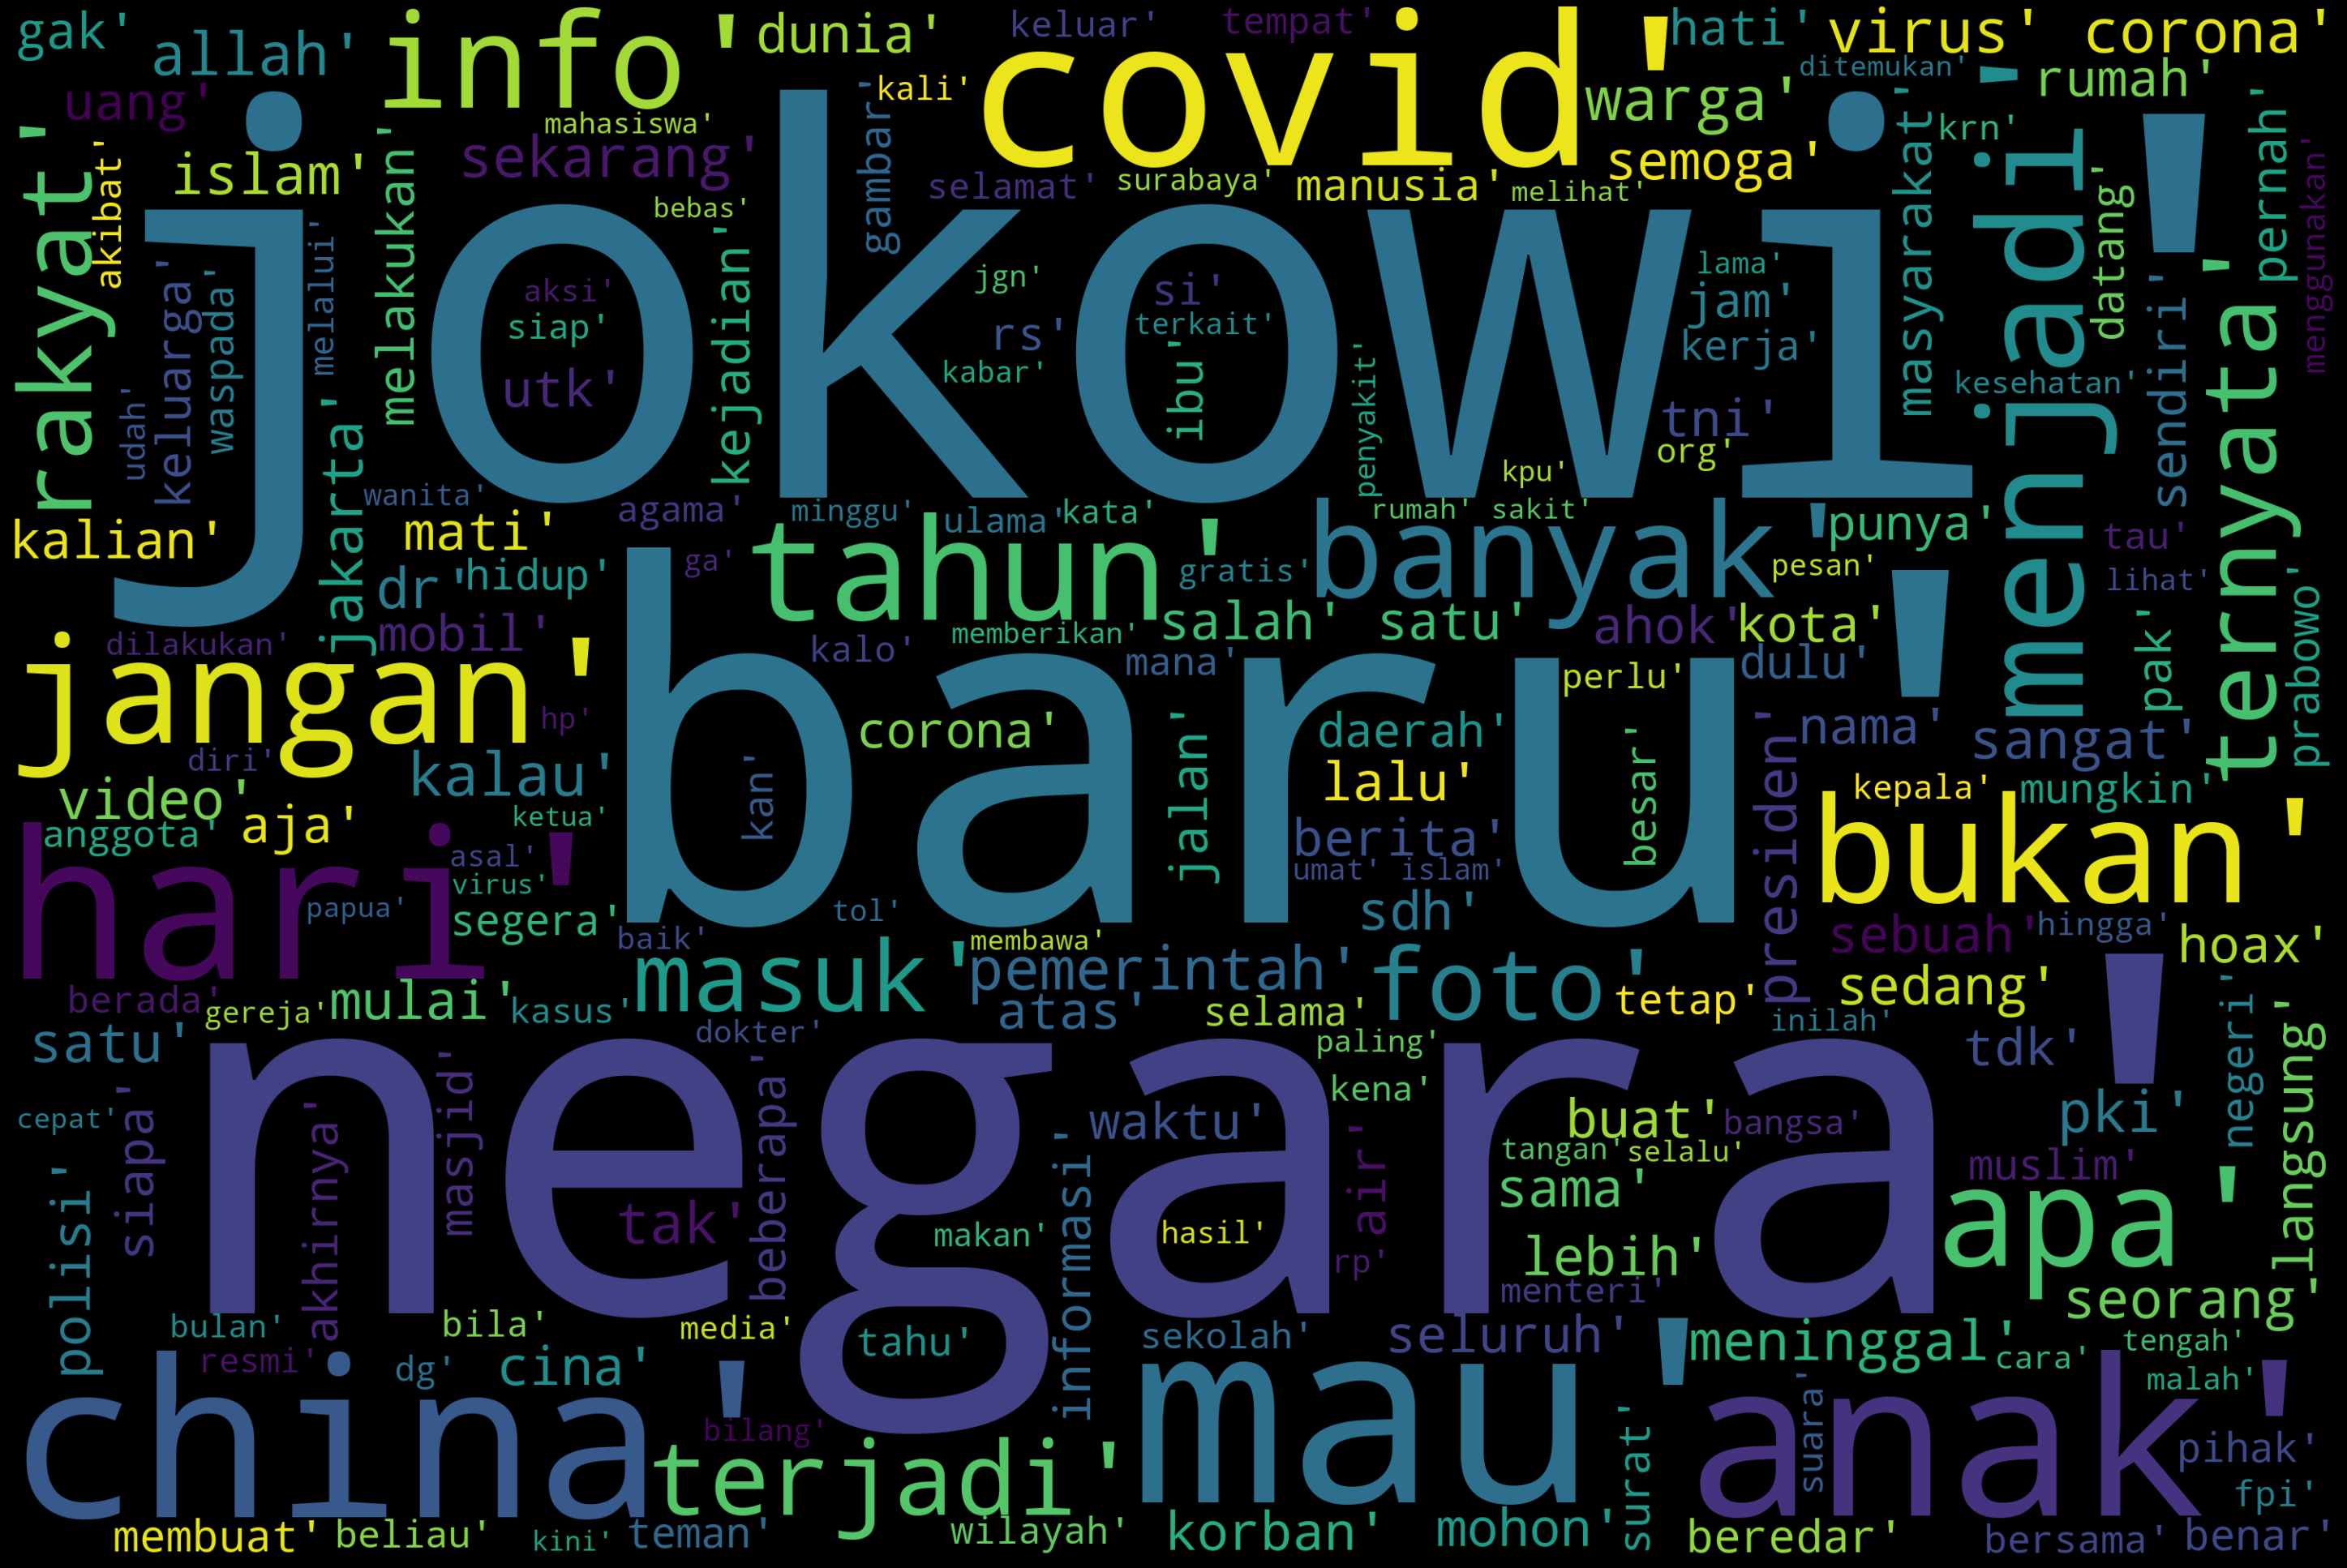

In [44]:
# word Cloud
text = ''
for news in df_hoax.narasi.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("indonesian"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

### Build a Model

In [45]:
# convert to string
text = df_train['narasi']
def list_to_string(text):
  return " ".join(text)

In [46]:
df_train['narasi'] = text.apply(list_to_string)

#### Split the Data

In [47]:
from sklearn.model_selection import train_test_split

# Define the independent variable (x) and the dependent variable (y)
x = df_train['narasi'] # Independent variable (x)
y = df_train['label'] # Dependent variable (y)

In [48]:
# Split x and y into the train and test sets
from sklearn.model_selection import train_test_split

# Test data are 30% of the total data entry and the rest should be train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [49]:
print('The number of rows and columns of x_train is:', x_train.shape,'and the number of rows and columns of y_train is:', y_train.shape)
print('\nHoax percentage in training data is:')
print(y_train.value_counts(normalize=True))

print('\n The number of rows and columns of x_test is:', x_test.shape,'and the number of rows and columns of y_test is:', y_test.shape)
print('\n Hoax percentage in testing data is:')
print(y_test.value_counts(normalize=True))

The number of rows and columns of x_train is: (2961,) and the number of rows and columns of y_train is: (2961,)

Hoax percentage in training data is:
1    0.821006
0    0.178994
Name: label, dtype: float64

 The number of rows and columns of x_test is: (1270,) and the number of rows and columns of y_test is: (1270,)

 Hoax percentage in testing data is:
1    0.814173
0    0.185827
Name: label, dtype: float64


#### Convert Text Data to Vector

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

#### Data Modelling

Here are some algorithms that will be tested to determine the best model:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Gaussian Naive Bayes
5. Neural Network
6. K-Nearest Neighbor
7. Support Vector Machine

#### Logistic Regression Algorithm

In [52]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression().fit(x_train,y_train)

##### Performance of Training Model

In [53]:
log_model.score(x_train, y_train)

0.8321513002364066

In [54]:
from sklearn.metrics import confusion_matrix, classification_report

# predict
train_pred_log = log_model.predict(x_train)

# print classification report
print('Classification Report for Training Model (Logistic Regression Algorithm): \n')
print(classification_report(y_train, train_pred_log))

Classification Report for Logistic Regression Algorithm: 

              precision    recall  f1-score   support

           0       0.95      0.07      0.12       530
           1       0.83      1.00      0.91      2431

    accuracy                           0.83      2961
   macro avg       0.89      0.53      0.52      2961
weighted avg       0.85      0.83      0.77      2961



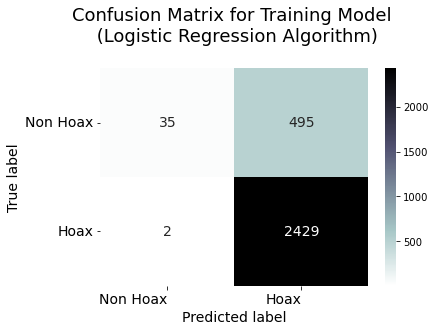

In [66]:
# Form confusion matrix as a DataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, train_pred_log)), ('Non Hoax', 'Hoax'), ('Non Hoax', 'Hoax'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model \n (Logistic Regression Algorithm)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

##### Performance of Testing Model

In [67]:
log_model.score(x_test, y_test)

0.8173228346456692

In [68]:
from sklearn.metrics import confusion_matrix, classification_report

# predict
test_pred_log = log_model.predict(x_test)

# print classification report
print('Classification Report for Testing Model (Logistic Regression Algorithm): \n')
print(classification_report(y_test, test_pred_log))

Classification Report for Testing Model (Logistic Regression Algorithm): 

              precision    recall  f1-score   support

           0       0.62      0.04      0.08       236
           1       0.82      0.99      0.90      1034

    accuracy                           0.82      1270
   macro avg       0.72      0.52      0.49      1270
weighted avg       0.78      0.82      0.75      1270



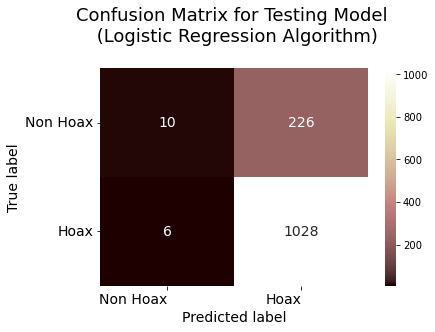

In [69]:
# Form confusion matrix as a DataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, test_pred_log)), ('Non Hoax', 'Hoax'), ('Non Hoax', 'Hoax'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='pink')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model \n (Logistic Regression Algorithm)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### Decision Tree Algorithm

In [72]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier().fit(x_train, y_train)

##### Performance of Training Model

In [73]:
dt_model.score(x_train, y_train)

0.999662276258021

In [74]:
from sklearn.metrics import confusion_matrix, classification_report

# predict
train_pred_dt = dt_model.predict(x_train)

# print classification report
print('Classification Report for Training Model (Decision Tree Algorithm): \n')
print(classification_report(y_train, train_pred_dt))

Classification Report for Training Model (Decision Tree Algorithm): 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       530
           1       1.00      1.00      1.00      2431

    accuracy                           1.00      2961
   macro avg       1.00      1.00      1.00      2961
weighted avg       1.00      1.00      1.00      2961



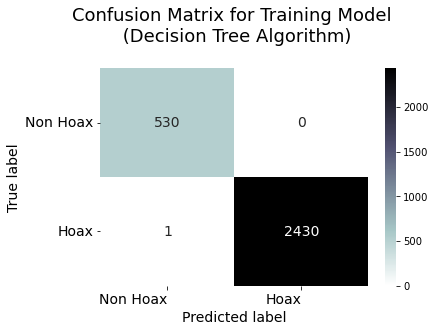

In [75]:
# Form confusion matrix as a DataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, train_pred_dt)), ('Non Hoax', 'Hoax'), ('Non Hoax', 'Hoax'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model \n (Decision Tree Algorithm)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

##### Performance of Testing Data

In [76]:
dt_model.score(x_test, y_test)

0.75748031496063

In [77]:
from sklearn.metrics import confusion_matrix, classification_report

# predict
test_pred_dt = dt_model.predict(x_test)

# print classification report
print('Classification Report for Testing Model (Decision Tree Algorithm): \n')
print(classification_report(y_test, test_pred_dt))

Classification Report for Testing Model (Decision Tree Algorithm): 

              precision    recall  f1-score   support

           0       0.33      0.31      0.32       236
           1       0.84      0.86      0.85      1034

    accuracy                           0.76      1270
   macro avg       0.59      0.58      0.59      1270
weighted avg       0.75      0.76      0.75      1270



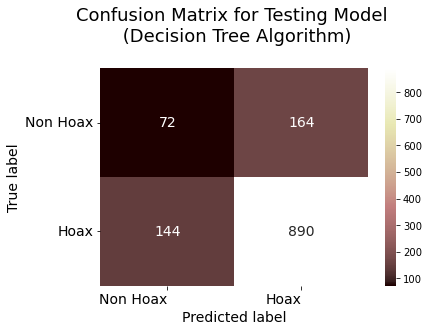

In [78]:
# Form confusion matrix as a DataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, test_pred_dt)), ('Non Hoax', 'Hoax'), ('Non Hoax', 'Hoax'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='pink')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model \n (Decision Tree Algorithm)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### Random Forest Algorithm

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(x_train, y_train)

##### Performance of Training Model

In [81]:
rf_model.score(x_train, y_train)

0.9993245525160419

In [82]:
from sklearn.metrics import confusion_matrix, classification_report

# predict
train_pred_rf = rf_model.predict(x_train)

# print classification report
print('Classification Report for Training Model (Random Forest Algorithm): \n')
print(classification_report(y_train, train_pred_rf))

Classification Report for Training Model (Random Forest Algorithm): 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       530
           1       1.00      1.00      1.00      2431

    accuracy                           1.00      2961
   macro avg       1.00      1.00      1.00      2961
weighted avg       1.00      1.00      1.00      2961



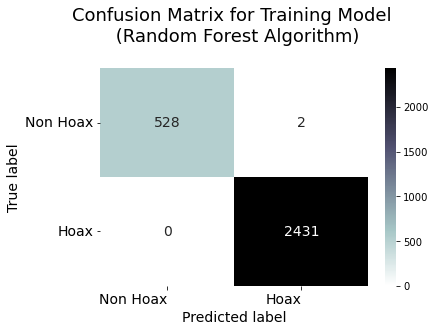

In [83]:
# Form confusion matrix as a DataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, train_pred_rf)), ('Non Hoax', 'Hoax'), ('Non Hoax', 'Hoax'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model \n (Random Forest Algorithm)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

##### Performance of Test Data

In [84]:
rf_model.score(x_test, y_test)

0.8196850393700787

In [85]:
from sklearn.metrics import confusion_matrix, classification_report

# predict
test_pred_rf = rf_model.predict(x_test)

# print classification report
print('Classification Report for Testing Model (Random Forest Algorithm): \n')
print(classification_report(y_test, test_pred_rf))

Classification Report for Testing Model (Random Forest Algorithm): 

              precision    recall  f1-score   support

           0       0.59      0.09      0.16       236
           1       0.83      0.99      0.90      1034

    accuracy                           0.82      1270
   macro avg       0.71      0.54      0.53      1270
weighted avg       0.78      0.82      0.76      1270



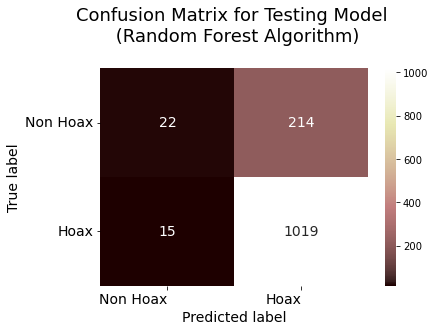

In [86]:
# Form confusion matrix as a DataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, test_pred_rf)), ('Non Hoax', 'Hoax'), ('Non Hoax', 'Hoax'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='pink')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model \n (Random Forest Algorithm)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### Naive Bayes Algorithm

In [87]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB().fit(x_train, y_train)

#### Performance of Training Model

In [88]:
nb_model.score(x_train, y_train)

0.8247213779128673

In [89]:
from sklearn.metrics import confusion_matrix, classification_report

# predict
train_pred_nb = nb_model.predict(x_train)

# print classification report
print('Classification Report for Training Model (Naive Bayes Algorithm):\n')
print(classification_report(y_train, train_pred_nb))

Classification Report for Training Model (Naive Bayes Algorithm):

              precision    recall  f1-score   support

           0       1.00      0.02      0.04       530
           1       0.82      1.00      0.90      2431

    accuracy                           0.82      2961
   macro avg       0.91      0.51      0.47      2961
weighted avg       0.86      0.82      0.75      2961



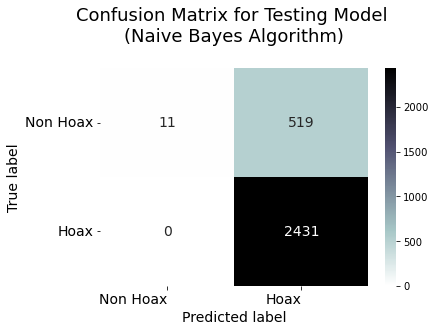

In [90]:
# Form confusion matrix as a DataFrame
confusion_matrix_nb = pd.DataFrame((confusion_matrix(y_train, train_pred_nb)), ('Non Hoax', 'Hoax'), ('Non Hoax', 'Hoax'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_nb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model \n(Naive Bayes Algorithm)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### Performance of Testing Model

In [91]:
nb_model.score(x_test, y_test)

0.8141732283464567

In [92]:
from sklearn.metrics import confusion_matrix, classification_report

# predict
test_pred_nb = nb_model.predict(x_test)

# print classification report
print('Classification Report for Testing Model (Naive Bayes Algorithm):\n')
print(classification_report(y_test, test_pred_nb))

Classification Report for Testing Model (Naive Bayes Algorithm):

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       236
           1       0.81      1.00      0.90      1034

    accuracy                           0.81      1270
   macro avg       0.41      0.50      0.45      1270
weighted avg       0.66      0.81      0.73      1270



C:\Users\USER KEMENDIKBUD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\USER KEMENDIKBUD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\USER KEMENDIKBUD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



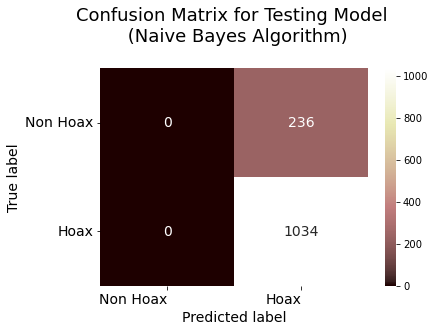

In [93]:
# Form confusion matrix as a DataFrame
confusion_matrix_nb = pd.DataFrame((confusion_matrix(y_test, test_pred_nb)), ('Non Hoax', 'Hoax'), ('Non Hoax', 'Hoax'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_nb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='pink')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model \n (Naive Bayes Algorithm)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### Neural Network Algorithm

In [94]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,),random_state=1).fit(x_train, y_train)

#### Performance of Training Model

In [95]:
nn_model.score(x_train, y_train)

0.999662276258021

In [96]:
from sklearn.metrics import confusion_matrix, classification_report

# predict
train_pred_nn = nn_model.predict(x_train)

# print classification report
print('Classification Report for Training Model (Neural Network Algorithm): \n')
print(classification_report(y_train, train_pred_nn))

Classification Report for Training Model (Neural Network Algorithm): 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       530
           1       1.00      1.00      1.00      2431

    accuracy                           1.00      2961
   macro avg       1.00      1.00      1.00      2961
weighted avg       1.00      1.00      1.00      2961



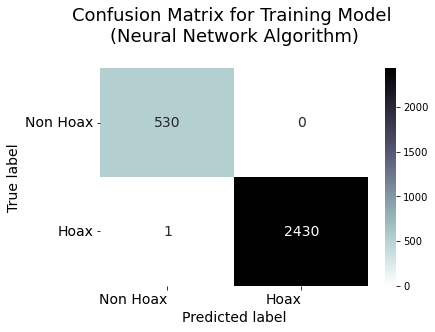

In [97]:
# Form confusion matrix as a DataFrame
confusion_matrix_nn = pd.DataFrame((confusion_matrix(y_train, train_pred_nn)), ('Non Hoax', 'Hoax'), ('Non Hoax', 'Hoax'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_nn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model \n(Neural Network Algorithm)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### Performance of Testing Model

In [98]:
nn_model.score(x_test, y_test)

0.8070866141732284

In [99]:
from sklearn.metrics import confusion_matrix, classification_report

# predict
test_pred_nn = nn_model.predict(x_test)

# print classification report
print('Classification Report for Testing Model (Neural Network Algorithm): \n')
print(classification_report(y_test, test_pred_nn))

Classification Report for Testing Model (Neural Network Algorithm): 

              precision    recall  f1-score   support

           0       0.47      0.29      0.36       236
           1       0.85      0.93      0.89      1034

    accuracy                           0.81      1270
   macro avg       0.66      0.61      0.62      1270
weighted avg       0.78      0.81      0.79      1270



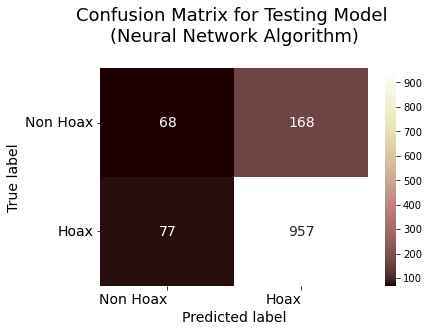

In [100]:
# Form confusion matrix as a DataFrame
confusion_matrix_nn = pd.DataFrame((confusion_matrix(y_test, test_pred_nn)), ('Non Hoax', 'Hoax'), ('Non Hoax', 'Hoax'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_nn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='pink')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model \n(Neural Network Algorithm)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### K-Nearest Neighbor Algorithm

In [101]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier().fit(x_train, y_train)

#### Performance of Training Model

In [102]:
knn_model.score(x_train, y_train)

0.8557919621749409

In [104]:
from sklearn.metrics import confusion_matrix, classification_report

# predict
train_pred_knn = knn_model.predict(x_train)

# print classification report
print('Classification Report for Training Model (K-Nearest Neighbor Algorithm): \n')
print(classification_report(y_train, train_pred_knn))

Classification Report for Training Model (K-Nearest Neighbor Algorithm): 

              precision    recall  f1-score   support

           0       0.77      0.28      0.41       530
           1       0.86      0.98      0.92      2431

    accuracy                           0.86      2961
   macro avg       0.82      0.63      0.66      2961
weighted avg       0.85      0.86      0.83      2961



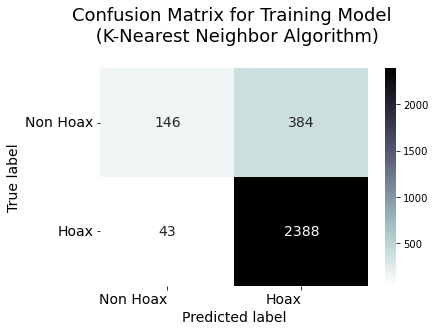

In [105]:
# Form confusion matrix as a DataFrame
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_train, train_pred_knn)), ('Non Hoax', 'Hoax'), ('Non Hoax', 'Hoax'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model \n (K-Nearest Neighbor Algorithm)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### Performance of Testing Model

In [106]:
knn_model.score(x_test, y_test)

0.7992125984251969

In [107]:
from sklearn.metrics import confusion_matrix, classification_report

# predict
test_pred_knn = knn_model.predict(x_test)

# print classification report
print('Classification Report for Testing Model (K-Nearest Neighbor Algorithm): \n')
print(classification_report(y_test, test_pred_knn))

Classification Report for Testing Model (K-Nearest Neighbor Algorithm): 

              precision    recall  f1-score   support

           0       0.39      0.14      0.20       236
           1       0.83      0.95      0.89      1034

    accuracy                           0.80      1270
   macro avg       0.61      0.54      0.54      1270
weighted avg       0.75      0.80      0.76      1270



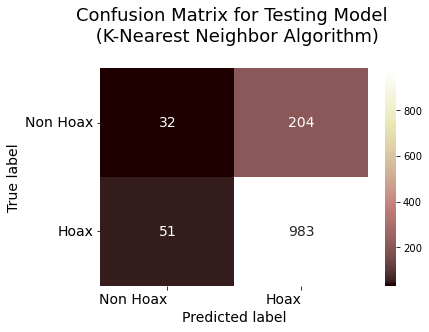

In [108]:
# Form confusion matrix as a DataFrame
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_test, test_pred_knn)), ('Non Hoax', 'Hoax'), ('Non Hoax', 'Hoax'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='pink')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model \n (K-Nearest Neighbor Algorithm)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### Support Vector Machine

In [110]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear').fit(x_train, y_train)

#### Performance of Training Model

In [111]:
svc_model.score(x_train, y_train)

0.9263762242485647

In [112]:
from sklearn.metrics import confusion_matrix, classification_report

# predict
train_pred_svc = svc_model.predict(x_train)

# print classification report
print('Classification Report for Testing Model (K-Nearest Neighbor Algorithm): \n')
print(classification_report(y_train, train_pred_svc))

Classification Report for Testing Model (K-Nearest Neighbor Algorithm): 

              precision    recall  f1-score   support

           0       0.99      0.59      0.74       530
           1       0.92      1.00      0.96      2431

    accuracy                           0.93      2961
   macro avg       0.96      0.80      0.85      2961
weighted avg       0.93      0.93      0.92      2961



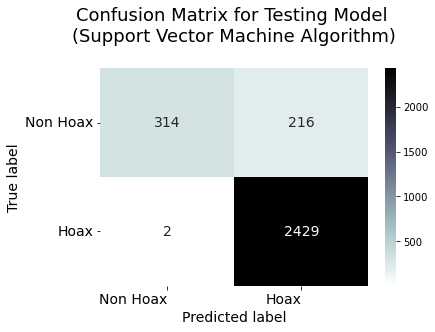

In [113]:
# Form confusion matrix as a DataFrame
confusion_matrix_svc = pd.DataFrame((confusion_matrix(y_train, train_pred_svc)), ('Non Hoax', 'Hoax'), ('Non Hoax', 'Hoax'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_svc, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model \n(Support Vector Machine Algorithm)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### Performance of Testing Model

In [114]:
svc_model.score(x_test, y_test)

0.8236220472440945

In [115]:
from sklearn.metrics import confusion_matrix, classification_report

# predict
test_pred_svc = svc_model.predict(x_test)

# print classification report
print('Classification Report for Testing Model (K-Nearest Neighbor Algorithm): \n')
print(classification_report(y_test, test_pred_svc))

Classification Report for Testing Model (K-Nearest Neighbor Algorithm): 

              precision    recall  f1-score   support

           0       0.61      0.14      0.23       236
           1       0.83      0.98      0.90      1034

    accuracy                           0.82      1270
   macro avg       0.72      0.56      0.56      1270
weighted avg       0.79      0.82      0.78      1270



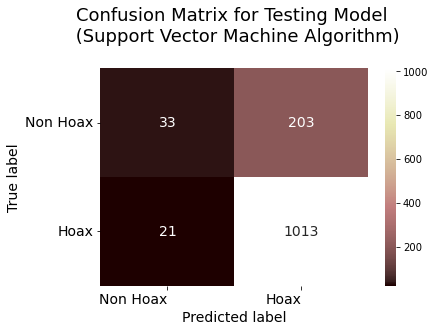

In [116]:
# Form confusion matrix as a DataFrame
confusion_matrix_svc = pd.DataFrame((confusion_matrix(y_test, test_pred_svc)), ('Non Hoax', 'Hoax'), ('Non Hoax', 'Hoax'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_svc, annot=True, annot_kws={'size': 14}, fmt='d', cmap='pink')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model \n (Support Vector Machine Algorithm)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

#### Model Selection

A good model is a model that can provide good performance in the train and test datasets.

- **Over-Fitting**: Good performance on the train data, poor generalization to other data.
- **Under-Fitting** : Poor performance on the train data and poor generalization to other data
- **Appropriate-Fitting** : Good performance on the train data, good generalization to other data.

<div align="center">
    
Algorithm |Train Data Accuracy | Test Data Accuracy
:-------------: | :-------------: | :-------------:
Logistic Regression | 0.832 | 0.817
Decision Tree  | 0.999 | 0.757
Random Forest | 0.999 |0.819
Naive Bayes  | 0.824 |0.814
Neural Network | 0.999 |0.807
K-Nearest Neighbor | 0.855 |0.799
Support Vector Machine | 0.93 |0.823
    
</div>

Based on the model selection, it's concluded that the **best algorithm** to predict the hoax is the **gaussian naive bayes**. This is because model with naive bayes algorithm tends to be able to predict data well in training and testing sets. On the other hand, other algorithms tend to overfit their performance.